# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.

     

#### Data Dictionary

>   01 - PatientId: Identification of a patient

>   02 - AppointmentID: Identification of each appointment

>   03 - Gender: Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.

>   04 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

>   05 - AppointmentDay: The day of the actual appointment, when they have to visit the doctor.

>   06 - Age: How old the patient is.

>   07 - Neighbourhood: Where the appointment takes place.

>   08 - Scholarship: True of False. Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    
>   09 - Hipertension: True or False
    If the patient has hypertension or not.
    
>   10 - Diabetes: True or False. If the patient has diabetes or not.

>   11 - Alcoholism: True or False. If the patient is an alcoholic or not.
    
>   12 - Handcap: True or False. If the patient is handicapped or not.
   
>   13 - SMS_received: True or False. If the patient received an SMS for the appointment or not.
    
>   14 - No-show: No if the patient showed up to their appointment, and Yes if they did not show up.


    
### Question(s) for Analysis
> The following question will guide our analysis of the dataset:
  1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties


In [2]:
df = pd.read_csv('alx_NSA.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
df.shape # check for number of rows and columns in the dataset

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()  # statistical description of the dataset

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
sum(df.duplicated()) # check for duplicated rows in the dataset 

0

#### Remove Extraneous Columns

The columns we are going to remove include **PatientID, AppointmentID, AppointmentDay**. These columns are not relevant to our analysis.

In [7]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head() # check if the changes have been made

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

#### Remove outliers from the Age column

We noticed from the description of the dataset earlier that the minimum age of the patients is -1. This is not a possible instance of age. We will verify the distribution of age to detect outliers.

For this, we will use plotly to visualize the distribution of age.

In [8]:
import plotly.express as px

In [9]:
fig = px.histogram(df,
                  x='Age',
                  marginal='box',
                  title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

From the above visual, it is evident that there is an age value of -1 which is not possible. We will remove the row from our dataset

In [10]:
df[df['Age']== -1]

Gender          ScheduledDay        AppointmentDay  Age Neighbourhood  \
99832      F  2016-06-06T08:58:13Z  2016-06-06T00:00:00Z   -1         ROMÃO   

       Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
99832            0             0         0           0        0             0   

      No-show  
99832      No

In [11]:
df.drop(labels=99832, axis=0, inplace=True)

In [12]:
df.shape # to confirm that the row has been

(110526, 12)

In [13]:
df[df['Age'] == -1] # to confirm that the row has been removed

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

#### Fix Datatype

The column **'ScheduledDay', AppointmentDay** is in string format. To ease our analysis, we will convert it to datetime format.

We will also create some new column **waiting_days** which will represent the number of days between day of scheduling an appointment and the day of appointment. Likewise, we will create new columns for appointment day name.

In [14]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
# obtain waiting days by subtracting scheduled day from appointment day
df['waiting_days'] = df['AppointmentDay'] - df['ScheduledDay']

# convert the difference to number of days
df['waiting_days'] = df['waiting_days'].dt.days

In [16]:
# create columns for the scheduled and appointment day name
df["Sch_dayofweek"] = df["ScheduledDay"].dt.day_name()
df["App_dayofweek"] = df["AppointmentDay"].dt.day_name()

In [17]:
df.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   waiting_days Sch_dayofweek App_dayofweek  
0             0        Friday        Friday  
1             0        Friday        Friday  
2             0        Friday        Friday  
3             0        Friday        Friday  
4             0        Friday        Friday

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  int64         
 6   Hipertension    110526 non-null  int64         
 7   Diabetes        110526 non-null  int64         
 8   Alcoholism      110526 non-null  int64         
 9   Handcap         110526 non-null  int64         
 10  SMS_received    110526 non-null  int64         
 11  No-show         110526 non-null  object        
 12  waiting_days    110526 non-null  int64         
 13  Sch_dayofweek   110526 non-null  object        
 14  App_dayofweek   110526 non-null  obj

**We will also create columns; year, month and day for the Appointment day**

In [19]:
df['year'] = pd.DatetimeIndex(df.AppointmentDay).year
df['month'] = pd.DatetimeIndex(df.AppointmentDay).month
df['day'] = pd.DatetimeIndex(df.AppointmentDay).day

In [20]:
df.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   waiting_days Sch_dayofweek App_dayofweek  year  month  day  
0             0        Friday        Friday  2016      4   29  
1             0        Friday        Friday  2016      4   29  
2             0        Friday        Friday  2016      4   29  
3             0        Friday        Friday  2016      4   29  
4             0        Friday        Friday  2016      4   29

## Exploratory Data Analysis

> In this section, we will explore our dataset so as to provide answers to the questions we have set earlier. We will compute statistics and create visualization that will address each question posed in the introductory section. 

### Research Question: What factors are important for us to predict if a patient will show up or not?

This is a very broad question, we are going to divide the question into more specific questions and answer it accordingly.  

#### Q1. How does the waiting days between scheduled day and appointment day affect showing up for appointments?

To answer this, we will compute the statistics of waiting days to see how it affects showing up for appointments.

First, let's check if there are some abnormal occurences in waiting days. In a case where the scheduled day is dated to a date after appointment, then we can assume that something is wrong and it is ideal that we remove those observations from our datasets.

In [21]:
df[df['waiting_days'] < 0]

Gender ScheduledDay AppointmentDay  Age  Neighbourhood  Scholarship  \
27033      M   2016-05-10     2016-05-09   38    RESISTÊNCIA            0   
55226      F   2016-05-18     2016-05-17   19  SANTO ANTÔNIO            0   
64175      F   2016-05-05     2016-05-04   22     CONSOLAÇÃO            0   
71533      F   2016-05-11     2016-05-05   81  SANTO ANTÔNIO            0   
72362      M   2016-05-04     2016-05-03    7     TABUAZEIRO            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
27033             0         0           0        1             0     Yes   
55226             0         0           0        1             0     Yes   
64175             0         0           0        0             0     Yes   
71533             0         0           0        0             0     Yes   
72362             0         0           0        0             0     Yes   

       waiting_days Sch_dayofweek App_dayofweek  year  month  day  
27033            -1       Tuesday        Monday  2016      5    9  
55226            -1     Wednesday       Tuesday  2016      5   17  
64175            -1      Thursday     Wednesday  2016      5    4  
71533            -6     Wednesday      Thursday  2016      5    5  
72362            -1     Wednesday       Tuesday  2016      5    3

As we can see, there exists such abnormal occurences. We are going to remove these observations.

In [22]:
df.drop(labels=df[df['waiting_days'] < 0].index, axis=0, inplace=True)

Let us confirm the changes we have made

In [23]:
df[df['waiting_days'] < 0]

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show, waiting_days, Sch_dayofweek, App_dayofweek, year, month, day]
Index: []

We will seperate our dataset into two; one for patients that showed up and the other for No-show patients

In [24]:
# Patients that showed up... i.e where 'No-show' is No
show_yes = df[df['No-show'] == 'No']
show_yes.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   waiting_days Sch_dayofweek App_dayofweek  year  month  day  
0             0        Friday        Friday  2016      4   29  
1             0        Friday        Friday  2016      4   29  
2             0        Friday        Friday  2016      4   29  
3             0        Friday        Friday  2016      4   29  
4             0        Friday        Friday  2016      4   29

In [25]:
# compute statistics for waiting days among the patients that showed up
show_yes['waiting_days'].describe()

count    88207.000000
mean         8.754759
std         14.550450
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: waiting_days, dtype: float64

Statistics of waiting days for patients that showed up reveal that their mean waiting days is approximately 9 days. the median number of days is 2 days.

In [26]:
# Patients that did not show up... i.e where 'No-show' is Yes
show_no = df[df['No-show'] == 'Yes']
show_no.head()

Gender ScheduledDay AppointmentDay  Age   Neighbourhood  Scholarship  \
6       F   2016-04-27     2016-04-29   23      GOIABEIRAS            0   
7       F   2016-04-27     2016-04-29   39      GOIABEIRAS            0   
11      M   2016-04-26     2016-04-29   29  NOVA PALESTINA            0   
17      F   2016-04-28     2016-04-29   40       CONQUISTA            1   
20      F   2016-04-27     2016-04-29   30  NOVA PALESTINA            0   

    Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
6              0         0           0        0             0     Yes   
7              0         0           0        0             0     Yes   
11             0         0           0        0             1     Yes   
17             0         0           0        0             0     Yes   
20             0         0           0        0             0     Yes   

    waiting_days Sch_dayofweek App_dayofweek  year  month  day  
6              2     Wednesday        Friday  2016      4   29  
7              2     Wednesday        Friday  2016      4   29  
11             3       Tuesday        Friday  2016      4   29  
17             1      Thursday        Friday  2016      4   29  
20             2     Wednesday        Friday  2016      4   29

In [27]:
# compute statistics for waiting days among the patients that did not show up
show_no['waiting_days'].describe()

count    22314.000000
mean        15.835484
std         16.605600
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: waiting_days, dtype: float64

Statistics of waiting days for patients that did not show up reveal that their mean waiting days is approximately 16 days. the median number of days is 11 days.

We can conclude using the above statistics that waiting days is an important factor that determine whether a patient will show up or not. The longer the waiting days, the more patients tend not to show up for their appointments.

Let us visualize this observation using a bar chart.

In [28]:
# set background to a darkgrid using seaborn
sns.set_style('darkgrid')

Text(0, 0.5, 'Average waiting days')

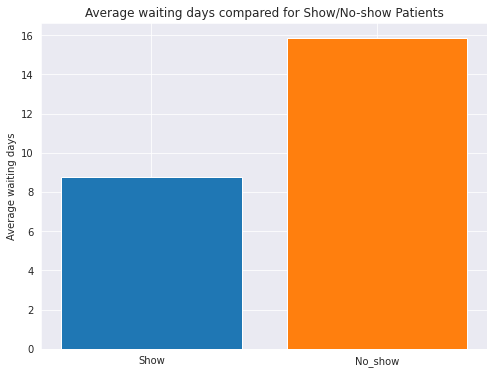

In [29]:
plt.figure(figsize=(8,6))
plt.bar(['Show'], show_yes['waiting_days'].mean())
plt.bar(['No_show'], show_no['waiting_days'].mean())
plt.title('Average waiting days compared for Show/No-show Patients')
plt.ylabel('Average waiting days')

### Q2. Which age range show up most for their appointment?

We will like to see how different age range show up for appointments. Therefore, we will create a new column for age group and cut the age ranges into four categories namely; **children, youth, adult and older people.**

We will then create two seperate datasets one for those that showed up and the other for those that didnt show up. We will obtain the proportions of Show/No-show patients based on age group and visualize it.

In [30]:
# describe the age column so as to determine the age range
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [31]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1,18,37,55,115]

In [32]:
# Labels for the four age groups
bin_names = ['children', 'youth', 'adult', 'older'] # Name each age category

In [33]:
# Creates age_group column
df['age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   waiting_days Sch_dayofweek App_dayofweek  year  month  day age_group  
0             0        Friday        Friday  2016      4   29     older  
1             0        Friday        Friday  2016      4   29     older  
2             0        Friday        Friday  2016      4   29     older  
3             0        Friday        Friday  2016      4   29  children  
4             0        Friday        Friday  2016      4   29     older

In [34]:
# define a function that calculate proportion

def proportion(data, sub_data, column):
    ratio = sub_data[column].value_counts() / data[column].value_counts()
    return ratio

In [35]:
show_yes = df[df['No-show'] == 'No']
show_no = df[df['No-show'] == 'Yes']

In [36]:
p_age_show = proportion(df, show_yes, 'age_group')
p_age_noshow = proportion(df, show_no, 'age_group')

print('Proportions of Patients that showed up according to age groups')
print(p_age_show)

Proportions of Patients that showed up according to age groups
children    0.780149
youth       0.764680
adult       0.804720
older       0.843581
Name: age_group, dtype: float64


We could see from the proportions that older people(age 55 and above) showed up most for appointments while youths(age 18-37) showed up least. We will appreciate this better by visualizing the proportions with bar chart.

It is important that we use proportion to carry out this type of statistics because the dataset might not be normally distributed

In [37]:
# create a function for column bar chart

def column_bar(X, y1, y2, label_y1='', label_y2='', xlabel='', ylabel='', title=''):
    X_axis = np.arange(len(X))
    plt.figure(figsize=(10,6))
    plt.bar(X_axis - 0.2, y1, 0.4, label=label_y1)
    plt.bar(X_axis + 0.2, y2, 0.4, label=label_y2)
    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

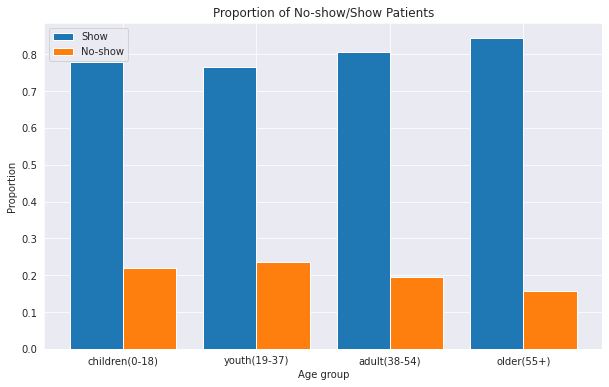

In [38]:
X = ['children(0-18)','youth(19-37)', 'adult(38-54)', 'older(55+)']
column_bar(X, p_age_show, p_age_noshow,
           label_y1='Show', label_y2='No-show',
           xlabel='Age group', ylabel='Proportion',
           title='Proportion of No-show/Show Patients')

The visualization above reveals that age groups of patient that show up for appointments from most to least are; **older > adult > children > youth**

### Q3. Does scholarship affects the rate at which patients show up for appointments?

We wiil analyze the dataset to observe if being on scholarship influence positively or negatively the showing up of patients for appointments.

In [39]:
# calculate proportion of patients with scholarship that showed up

p_sch_show = proportion(df, show_yes, 'Scholarship')
p_sch_noshow = proportion(df, show_no, 'Scholarship')

print('Proportions of Patients that showed up with or without scholarship')
print(p_sch_show)

Proportions of Patients that showed up with or without scholarship
0    0.801967
1    0.762637
Name: Scholarship, dtype: float64


We will visualize the relationship using a column bar chart

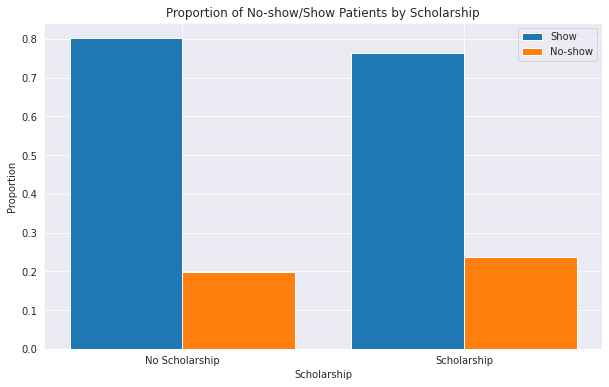

In [40]:
X = ['No Scholarship','Scholarship']
column_bar(X, p_sch_show, p_sch_noshow,
           label_y1='Show', label_y2='No-show',
           xlabel='Scholarship', ylabel='Proportion',
           title='Proportion of No-show/Show Patients by Scholarship')

Although there are more people with scholarship that showed up than those with scholarship and did not show up, it is the same with patients without scholarship. This is because there are more people that showed up for appointmment generally than those that did not show up.

Therefore we can only conclude from the above visualization that patients not on scholarsip tend to show up more for appointments. The reason for this may be because most of the patients on scholarship are from lower class, and may be some other factors that hindered them from utilizing the scholarship opportunity.

### Q4. Is there any difference between the proportion of male and female that show up for their appointments?

For this question, we are going to consider the proportion of male and females patients in the two datasets we have seperated earlier for show and no-show patients.

In [41]:
# calculate proportion of patients that showed up based on gender

p_gen_show = proportion(df, show_yes, 'Gender')
p_gen_noshow = proportion(df, show_no, 'Gender')

print('Proportions of Patients that showed up according to gender')
print(p_gen_show)

Proportions of Patients that showed up according to gender
F    0.796885
M    0.800362
Name: Gender, dtype: float64


We could see from the above results that there is no significant difference between the proportion of male that showed up and the female that showed up. This means that gender does not influence showing up of patients for appointments.

Let's visualize this observation with a bar chart.

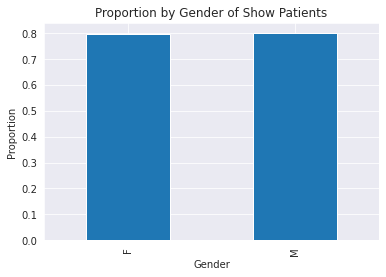

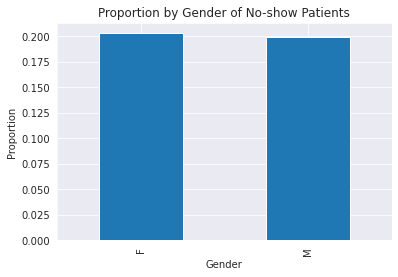

In [42]:
p_gen_show.plot(kind='bar')
plt.title('Proportion by Gender of Show Patients')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

p_gen_noshow.plot(kind='bar')
plt.title('Proportion by Gender of No-show Patients')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

### Q5. What is the relationship between receiving SMS and showing up for appointments?

To provide answer to this question, we will analyze the two seperated dataset (no-show and show) based on the proportion of each class that received SMS. 

In [43]:
df.groupby('No-show')['SMS_received'].value_counts()

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12530
         1                9784
Name: SMS_received, dtype: int64

There are more patients that did not receive SMS than those that received

In [44]:
# calculate proportion of patients(received SMS or not) that showed up

p_SMS_show = proportion(df, show_yes, 'SMS_received')
p_SMS_noshow = proportion(df, show_no, 'SMS_received')

print('Proportions of Patients that showed up with or without receiving SMS')
print(p_SMS_show)

Proportions of Patients that showed up with or without receiving SMS
0    0.833020
1    0.724255
Name: SMS_received, dtype: float64


We can observe from the statistics above, that the proportion of patients that received SMS and show up is lesser compared to proportion of patients that showed up without receiving SMS. This indicates that SMS does not have positive correlation to whether patients showing up or not.

We will show more evidence on this by visualizing our the statistics with barplot.

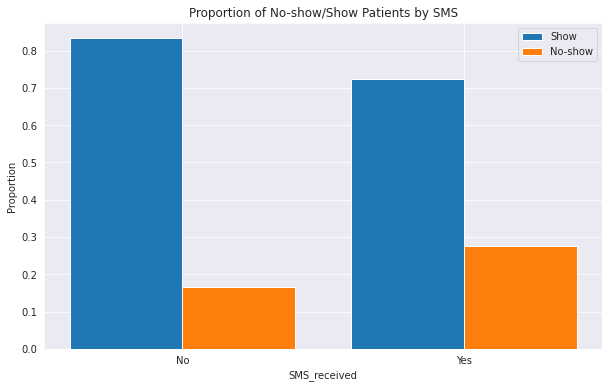

In [45]:
X = ['No', 'Yes']
column_bar(X, p_SMS_show, p_SMS_noshow,
           label_y1='Show', label_y2='No-show',
           xlabel='SMS_received', ylabel='Proportion',
           title='Proportion of No-show/Show Patients by SMS')

It is evident from the visualization above that SMS is not a contributing factor to patients showing up. If at all there is correlation between SMS and showing up, then we can conclude that group of patients that did not receive SMS are more likely to show up.

### Q6. Is alcoholism a factor that determine whether a patient showed up or not?

In [46]:
# calculate the proportion of patients (alcoholic/non-alcoholic) that showed up 
prop_show_alc = proportion(df, show_yes, 'Alcoholism')
prop_noshow_alc = proportion(df, show_no, 'Alcoholism')

print('Proportions of Patients that showed up alcoholic/non-alcoholic')
print(prop_show_alc)

Proportions of Patients that showed up alcoholic/non-alcoholic
0    0.798089
1    0.798512
Name: Alcoholism, dtype: float64


We can see from the result above that alcoholism does not have any effect on whether a patient will show up or not. There is no significant difference between patients that show up.

Let's visualize this result using a column bar chat

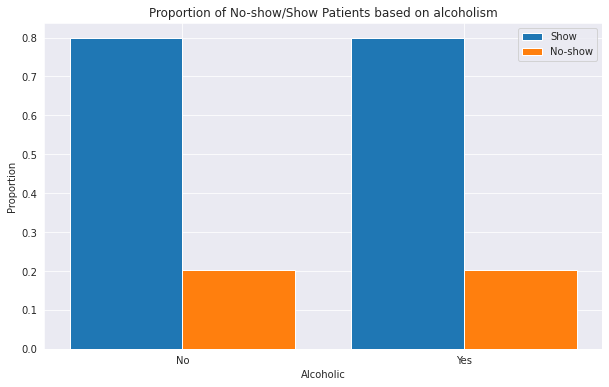

In [47]:
X = ['No', 'Yes']
column_bar(X, prop_show_alc, prop_noshow_alc,
           label_y1='Show', label_y2='No-show',
           xlabel='Alcoholic', ylabel='Proportion',
           title='Proportion of No-show/Show Patients based on alcoholism')

**Alcoholism** is not a factor that determine whether a patient show up or not.

#### Q7. Does suffering from one of the diseases (hypertension, diabetes and handicap) determine if a patient will show up for appointments?

First, we need to confirm that the column for hipertension, diabetes and handicap contain binary values 0 and 1. 0 stands for not suffering from the disease while 1 means suffering from it.

In [48]:
# confirm if the columns for diseases are made of binary values i.e 0 and 1
print(df['Hipertension'].unique())
print(df['Diabetes'].unique())
print(df['Handcap'].unique())

[1 0]
[0 1]
[0 1 2 3 4]


The **Handcap** column has values 2, 3, 4 instead of just 0 and 1. Since 0 means false and 1 means true, we are going to change all values greater than 1 in the handcap column to 1.

In [49]:
# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]

Gender ScheduledDay AppointmentDay  Age Neighbourhood  Scholarship  \
946         M   2016-04-14     2016-04-29   94    BELA VISTA            0   
1665        M   2016-03-30     2016-04-29   64  SANTA MARTHA            0   
1666        M   2016-03-30     2016-04-29   64  SANTA MARTHA            0   
2071        M   2016-04-29     2016-04-29   64  SANTA MARTHA            0   
2091        F   2016-04-29     2016-04-29   11    ANDORINHAS            0   
...       ...          ...            ...  ...           ...          ...   
108376      F   2016-06-01     2016-06-07   44         ROMÃO            0   
109484      M   2016-05-31     2016-06-02   64      DA PENHA            0   
109733      F   2016-06-03     2016-06-07   34   JUCUTUQUARA            0   
109975      M   2016-06-02     2016-06-06   39  PRAIA DO SUÁ            1   
110107      F   2016-06-02     2016-06-06   44   RESISTÊNCIA            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
946                1         1           0        2             1      No   
1665               1         0           1        2             1      No   
1666               1         0           1        2             0      No   
2071               1         0           1        2             0      No   
2091               0         0           0        2             0      No   
...              ...       ...         ...      ...           ...     ...   
108376             1         1           0        2             1      No   
109484             1         1           0        2             0      No   
109733             0         0           0        2             1      No   
109975             0         0           0        2             1      No   
110107             0         0           0        2             1      No   

        waiting_days Sch_dayofweek App_dayofweek  year  month  day age_group  
946               15      Thursday        Friday  2016      4   29     older  
1665              30     Wednesday        Friday  2016      4   29     older  
1666              30     Wednesday        Friday  2016      4   29     older  
2071               0        Friday        Friday  2016      4   29     older  
2091               0        Friday        Friday  2016      4   29  children  
...              ...           ...           ...   ...    ...  ...       ...  
108376             6     Wednesday       Tuesday  2016      6    7     adult  
109484             2       Tuesday      Thursday  2016      6    2     older  
109733             4        Friday       Tuesday  2016      6    7     youth  
109975             4      Thursday        Monday  2016      6    6     adult  
110107             4      Thursday        Monday  2016      6    6     adult  

[199 rows x 19 columns]

In [50]:
# filling the values other than 0 and 1, with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

In [51]:
# confirm if the changes have been made
df['Handcap'].unique()

array([0, 1])

We will compute the statistics of the three diseases and visualize them using bar plot

In [52]:
# proportion of people that showed up with or without being hypertensive

prop_show_hyp = show_yes['Hipertension'].value_counts() / df['Hipertension'].value_counts()
prop_show_hyp

0    0.791005
1    0.826980
Name: Hipertension, dtype: float64

In [53]:
# proportion of people that showed up with or without being diabetic

prop_show_dia = show_yes['Diabetes'].value_counts() / df['Diabetes'].value_counts()
prop_show_dia

0    0.796409
1    0.819967
Name: Diabetes, dtype: float64

In [54]:
# create a new show dataset to reflect the new changes made with the handicap column
show_yes = df[df['No-show'] == 'No']

In [55]:
# proportion of people that showed up with or without being handicapped

prop_show_han = show_yes['Handcap'].value_counts() / df['Handcap'].value_counts()
prop_show_han

0    0.797667
1    0.819116
Name: Handcap, dtype: float64

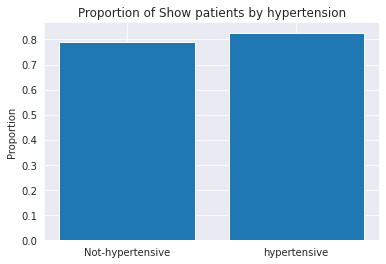

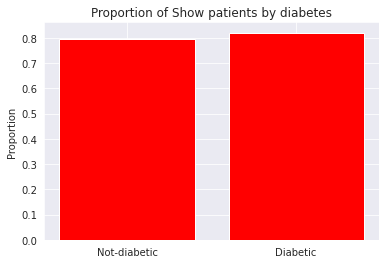

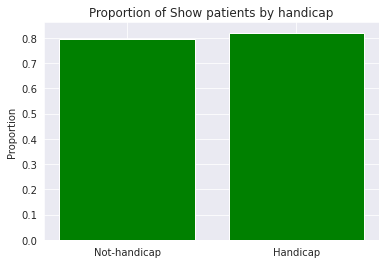

In [56]:
plt.bar(['Not-hypertensive', 'hypertensive'], prop_show_hyp)
plt.title('Proportion of Show patients by hypertension')
plt.ylabel('Proportion')
plt.show()

plt.bar(['Not-diabetic', 'Diabetic'], prop_show_dia, color='r')
plt.title('Proportion of Show patients by diabetes')
plt.ylabel('Proportion')
plt.show()

plt.bar(['Not-handicap', 'Handicap'], prop_show_dia, color='g')
plt.title('Proportion of Show patients by handicap')
plt.ylabel('Proportion')
plt.show()

The proportion computed above and the visualization revealed to us that patients that are suffering from one of hypertension, diabetes and handicap are more likely to show up for their appointments.

### Q8. Which day of the week are patients most likely to turn up for their appointments?

Here, we want to examine how the day of the week in which patient's appointment is fixed influenced showing up for appointment.

To analyze this, we will make use of proportion as well so as to normalize our data.

In [57]:
# get the total count of patients based on day of the week the appointment is fixed
df['App_dayofweek'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: App_dayofweek, dtype: int64

In [75]:
# obtain the proportions of each day of the week represented in the dataset and sort it from highest to lowest
p_day_show = (show_yes['App_dayofweek'].value_counts() / df['App_dayofweek'].value_counts()).sort_values(ascending=False)
p_day_noshow = (show_no['App_dayofweek'].value_counts() / df['App_dayofweek'].value_counts()).sort_values()

print('Proportions of Patients that showed up according to day of the week')
print(p_day_show)

Proportions of Patients that showed up according to day of the week
Thursday     0.806506
Wednesday    0.803139
Tuesday      0.799126
Monday       0.793554
Friday       0.787739
Saturday     0.769231
Name: App_dayofweek, dtype: float64


We observed that even though the proportions are close, Thursday happened to be the day patients likely to show up for their appointment most... Saturday is the least. We will observe this difference closely by visualizing the result using a column bar chart.

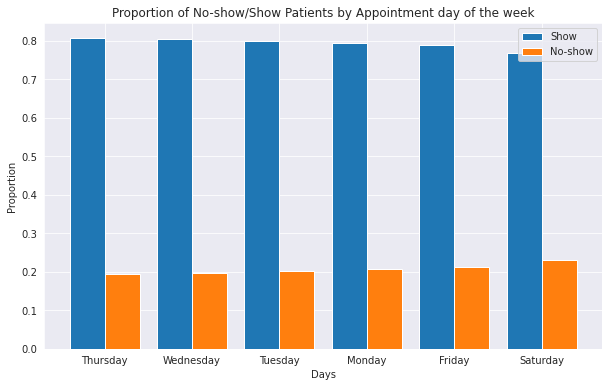

In [77]:
X = ['Thursday','Wednesday', 'Tuesday', 'Monday', 'Friday', 'Saturday']
column_bar(X, p_day_show, p_day_noshow,
           label_y1='Show', label_y2='No-show',
           xlabel='Days', ylabel='Proportion',
           title='Proportion of No-show/Show Patients by Appointment day of the week')

## Conclusion

> In this section, we are going to summarize our findings and results of analysis that we performed. We will make some few conclusions about our data based on the findings but not statistical conclusions,  since we did not use any statistical test.

#### Our conclusion will focus on summarizing the questions we already answered in the EDA section.

#### 1. Age is an important factor in predicting whether a patient will show up or not.

Older patients show up mostly for appointments while youths show up the least.

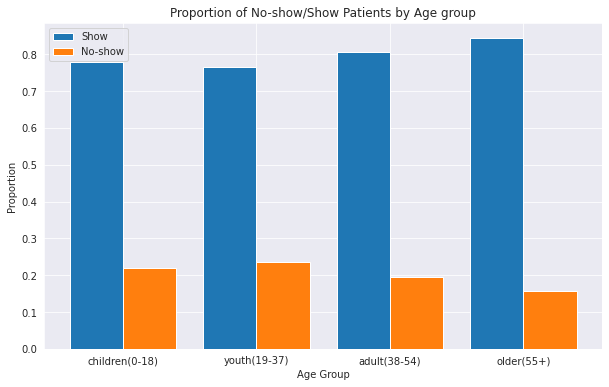

In [79]:
X = ['children(0-18)','youth(19-37)', 'adult(38-54)', 'older(55+)']
column_bar(X, p_age_show, p_age_noshow,
           label_y1='Show', label_y2='No-show',
           xlabel='Age Group', ylabel='Proportion',
           title='Proportion of No-show/Show Patients by Age group')

#### 2. The waiting days (between scheduled and appointment day) is an important factor that determine whether a patient will show up or not.

Earlier in the EDA section, we compute the mean waiting days for patients that showed up and those that did not show up. The result revealed that the mean waiting days for those that show up is lesser than the mean of those that did not show up. This implies that patients are likely to show up if their appointment day is not far from the day they scheduled appointment.

We visualize the mean difference using a bar chat.

Text(0, 0.5, 'Average waiting days')

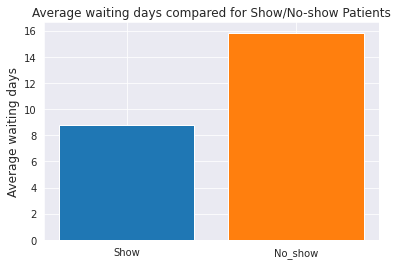

In [80]:
plt.bar(['Show'], show_yes['waiting_days'].mean())
plt.bar(['No_show'], show_no['waiting_days'].mean())
plt.title('Average waiting days compared for Show/No-show Patients')
plt.ylabel('Average waiting days', fontsize=12)

As much as this result is convincing, we can not determine which range of waiting days are patients most likely to show up. To determine this, we will divide the waiting days to certain ranges and calculate the proportion of each range among patients that show up. 

In [81]:
df['waiting_days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

In [82]:
bin_edges = [-1, 20, 50, 90, 180]
bin_names = ['within 20days', '21-50days', '51-90days', 'over 90days']

df['wait_days_range'] = pd.cut(df['waiting_days'], bin_edges, labels=bin_names)
df.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   waiting_days Sch_dayofweek App_dayofweek  year  month  day age_group  \
0             0        Friday        Friday  2016      4   29     older   
1             0        Friday        Friday  2016      4   29     older   
2             0        Friday        Friday  2016      4   29     older   
3             0        Friday        Friday  2016      4   29  children   
4             0        Friday        Friday  2016      4   29     older   

  wait_days_range  
0   within 20days  
1   within 20days  
2   within 20days  
3   within 20days  
4   within 20days

In [83]:
show_yes = df[df['No-show'] == 'No']
show_no = df[df['No-show'] == 'Yes']

In [84]:
prop_show = show_yes['wait_days_range'].value_counts() / df['wait_days_range'].value_counts()
prop_show

within 20days    0.827209
21-50days        0.667708
51-90days        0.693233
over 90days      0.741935
Name: wait_days_range, dtype: float64

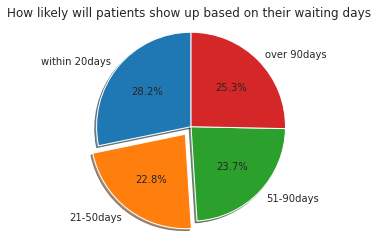

In [85]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['within 20days', '21-50days', '51-90days', 'over 90days']
sizes = prop_show
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. '21-50days')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('How likely will patients show up based on their waiting days')
plt.show()

The computed proportions and visualization of the waiting days reveal to us that patients that are fixed for appointment **within the first 20days of scheduling are most likely to show up**. An irregularity is found in the result. The proportion of patients with waiting days of 90days showed up more than those with day range of 21-50 and 51-90days. 

#### 3. Scholarship and SMS_received are not factors that contribute to patients showing up for appointment.

The group of patients without scholarship has a higher proportion for showing up for appointments than those with scholarship. In a similar situation, patients that do not receive SMS are likely to show up for appointments than those that receive SMS.  

We might assume that our dataset is not balanced as we would expect that patients with scholarship or those that received SMS should show up most for appointments.

To confirm whether there is relationship between having scholarship and showing up for appointments, we will carry out a statistical test called **chi-square test of independence.** We will do the same for SMS received.

### Chi-Square test of Independence

>We use chi-square test of independence to statistically determine the relationship between two categorical vvariables. In this case **Scholarship vs No-show** columns of our dataset. Chi-square produce a p-value as result which will be interpreted to either reject a null hypothesis and retain the alternative hypothesis, or retain the null hypothesis at 95% level of confidence. It is interpreted as follows:
>- if p-value is < 0.05; reject null hypothesis and retain alternative hypothesis
>- if p-value is >= 0.05; retain null hypothesis and reject alternative hypothesis


>Usually the null hypothesis for a  chi-square test is that there is no relationship between the two categorical variables

**Let's carry out the chi-square test to consider if there is relationship between scholarship and showing up for appointments**

In [106]:
# import additional package for chi-square test
from scipy.stats import chi2_contingency

# create contingency table with frequencies.
contigency = pd.crosstab(df['Scholarship'], df['No-show'])
print(contigency)

No-show         No    Yes
Scholarship              
0            79924  19736
1             8283   2578


In [91]:
# calculate the proportion by scholarship between the two classes of patients (Show/No-show)
contigency_pct = pd.crosstab(df['Scholarship'], df['No-show'], normalize='index')
print(contigency_pct)

No-show            No       Yes
Scholarship                    
0            0.801967  0.198033
1            0.762637  0.237363


<AxesSubplot:xlabel='No-show', ylabel='Scholarship'>

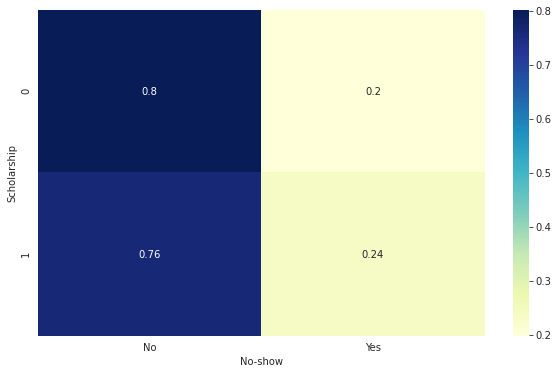

In [98]:
# visualize the contigency table using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(contigency_pct, annot=True, cmap='YlGnBu')

In [105]:
# chi-square test of independence
c, p, dof, expected = chi2_contingency(contigency_pct)

print('P-value: {}'.format(p))

P-value: 0.09975209003585624


From the chi-square test, the P-value is **0.099** which is greater than the **0.05 significant level**. Therefore we are going to retain the null hypothesis which means we will conclude that **there is no relationship between scholarship and showing up for appointment.**

Let's put the chi-square test process into a function so as to use it easily for other variables.

In [107]:
def chi2_test(data, var1, var2):
    contigency_pct = pd.crosstab(data[var1], data[var2], normalize='index')
    c, p, dof, expected = chi2_contingency(contigency_pct)
    print('P-value: {}'.format(p))

**Let us use this function to carry out test on SMS_received and No-show to determine if there is relationship.**

In [108]:
chi2_test(df, 'SMS_received', 'No-show')

P-value: 0.12902727911487433


Again the **p-value** is greater than **0.05**. Therefore we can conclude that **there is no relationship between receiving SMS and showing up for appointments**

#### 4. Gender of patient does not have any influence on whether a patient will show up for appointment or not.

It is observed from our analysis that both male and female patients have the same ratio of showing up for appointments.

In [68]:
g_show = show_yes['Gender'].value_counts() / df['Gender'].value_counts()
print('Proportion of patients that show up by gender')
print(g_show)

Proportion of patients that show up by gender
F    0.796885
M    0.800362
Name: Gender, dtype: float64


Text(0, 0.5, 'Proportion')

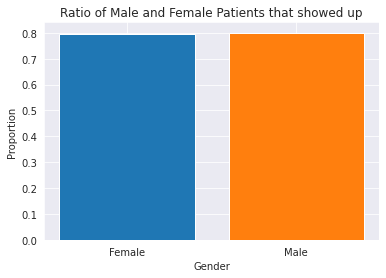

In [69]:
plt.bar('Female', g_show[0])
plt.bar('Male', g_show[1])
plt.title('Ratio of Male and Female Patients that showed up')
plt.xlabel('Gender')
plt.ylabel('Proportion')

We will confirm that there is no relationship between gender and showing up for appointment using a chi-square test

In [110]:
chi2_test(df, 'Gender', 'No-show')

P-value: 0.07890072699115507


P-value is greater than 0.05, hence there is no relationship

#### 5. Patients suffering from one or more diseases are likely to show up more for appointments.

Earlier, we have shown that people with a particular disease are more likely to show up than those without such disease. Although the proportional difference between those with a certain disease that showed up and those without the disease is quite small. We will like to compare the ratio of patients with the three diseases that showed up and those with the three diseases that did not show up. 

In [70]:
# create a new dataset for patients with the three diseases
df_dis_all = df[(df['Hipertension'] == 1) & (df['Diabetes'] == 1) & (df['Handcap'] == 1)]
df_dis_all['No-show'].value_counts()  # count the total number of patients show and no-show with the three diseases

No     303
Yes     55
Name: No-show, dtype: int64

In [71]:
df['No-show'].value_counts() 

No     88207
Yes    22314
Name: No-show, dtype: int64

In [72]:
# calculate the proportion of patients with the three diseases that showed and those that did not show. 
# multiply the proportion by 100 to get a significant value

prop_dis = (df_dis_all['No-show'].value_counts() / df['No-show'].value_counts()) * 100
prop_dis

No     0.343510
Yes    0.246482
Name: No-show, dtype: float64

We could see from the above result that there is a significant difference between the proportion of patients with the three diseases that showed up and those that did not show up, unlike the case of just 1 disease.

Text(0, 0.5, 'Proportion')

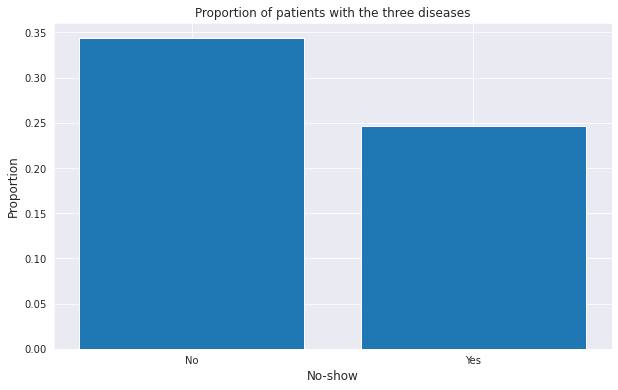

In [73]:
plt.figure(figsize=(10,6))
plt.bar(['No', 'Yes'], prop_dis)
plt.title('Proportion of patients with the three diseases', fontsize=12)
plt.xlabel('No-show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

We can conclude from the visual above that patients with the three diseases are **most likely** to turn up for their appointments. 

### Limitations of the study

>The limitations of this study is that the data is not normally distributed. Therefore, it poses a problem as to determining the exact relationship between independent and dependent variables.

## References

During my course of analysis, the following websites are visited for documentation and fixing of error.
- [Medical No-show appointment kaggle page](https://www.kaggle.com/joniarroba/noshowappointments)
- [GeekforGeeks](https://www.geeksforgeeks.org)
- [My github collections](https://github.com/Olalekanrasaq/Olalekanrasaq)
- [Jovian AI notebooks](https://jovian.ai/olalekanrasaq1331/notebooks)
- Chi-square test in python by George Pipis [here](https://predictivehacks.com/how-to-run-chi-square-test-in-python/)
